<a href="https://colab.research.google.com/github/Azelewine/Data-Science/blob/main/Data%20analysis%20based%20on%20online%20superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **INTRODUCTION**

**E-commerce(Online Superstore)**

This dataset consists of the sales of a store in USA in the past few years of the client company. Purchases are made online through the companies website . Known for selling furniture, technology and office appliances which are shipped to to other places in the USA. With the business growing bigger the client company wants some insights to increase profit and improve customer satisfactory.

**Project goals**
1. The client company wants to know about its customers
2. Trend of products amongst others.
3. An analyses is needed to help with the decision making.

For this, a data scienist is needed.



**METADATA**
1. Row ID : The unique ID for each row.
2. Order ID : This is the unique Order ID for each Customer.
3. Order Date:  The date when the Product was ordered.
4. Shipment Date: This is the shipping date of the Product.
5. Shipment Mode: Shipping Mode specified by the Customer.
6. Customer ID: Unique ID to identify each Customer.
7. Customer Name: Name of the Customer.
8. Segment: The segment where the Customer belongs.
9. Country : Country of residence of the Customer.
10. City : City of residence of the Customer.
11. State : State of residence of the Customer.
12. Postal Code : Postal Code of every Customer.
13. Region : Region where the Customer belong.
14. Product ID : Unique ID of the Product.
15. Category : Category of the product ordered.
16. Sub-Category : Sub-Category of the product ordered.
17. Product Name : Name of the Product
18. Sales : Sales of the Product.
19. Quantity : Quantity of the Product.
20. Discount : Discount provided.
21. Profit : Profit/Loss incurred.


# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import colormaps
import datetime as dt
import plotly.io as pio
import folium
from folium.plugins import HeatMap
import branca.colormap as cm



In [ ]:
pd.options.display.max_columns = None
giant = pd.read_csv("/content/Sample - Superstore.csv",encoding='latin-1')

# **EDA**

In [ ]:
giant.sample(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5200,5201,CA-2016-103982,3/3/2016,3/8/2016,Standard Class,AA-10315,Alex Avila,Consumer,United States,Round Rock,Texas,78664,Central,TEC-PH-10000895,Technology,Phones,Polycom VVX 310 VoIP phone,431.976,3,0.2,32.3982
9531,9532,CA-2017-102729,10/26/2017,10/31/2017,Standard Class,BF-11215,Benjamin Farhat,Home Office,United States,Dallas,Texas,75217,Central,OFF-ST-10000464,Office Supplies,Storage,"Multi-Use Personal File Cart and Caster Set, T...",55.616,2,0.2,5.5616
4112,4113,CA-2015-153717,12/25/2015,1/1/2016,Standard Class,DL-13495,Dionis Lloyd,Corporate,United States,Detroit,Michigan,48227,Central,OFF-AR-10002375,Office Supplies,Art,Newell 351,3.280,1,0.0,0.9512
52,53,CA-2015-115742,4/18/2015,4/22/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,New Albany,Indiana,47150,Central,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",89.990,1,0.0,17.0981


In [ ]:
giant.shape

(9994, 21)

In [ ]:
giant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
giant.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **DATA CLEANING**

In [ ]:

missing_values = giant.isna().sum()
missing_values

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


There are no missing values. I will input some NaN values to do some data cleaning.



In [ ]:
#Injecting NaN values.
ss = giant.copy()

for _ in range(100):
    i = np.random.randint(0, ss.shape[0])
    j = np.random.randint(0, ss.shape[1])
    ss.iloc[i, j] = None

print("After adding NaN:")
display(ss.isna().sum())

ss.to_csv("data_with_NaN.csv", index=False)

After adding NaN:


,0
Row ID,8
Order ID,3
Order Date,7
Ship Date,8
Ship Mode,3
Customer ID,3
Customer Name,3
Segment,3
Country,1
City,6


In [ ]:
ss_NaN = pd.read_csv("/content/data_with_NaN.csv")
ss_NaN.shape


(9994, 21)

Since the overall the missing values are small,so we shall drop the missing values.

In [ ]:
#Drop missing values
ss_NaN = ss_NaN.dropna()
ss_NaN.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8545,8546.0,CA-2016-119074,3/27/2016,3/31/2016,Standard Class,DS-13180,David Smith,Corporate,United States,Columbus,Georgia,31907.0,South,FUR-FU-10003731,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,39.920,4.0,0.0,11.1776
9029,9030.0,CA-2014-138198,7/18/2014,7/23/2014,Standard Class,JL-15130,Jack Lebron,Consumer,United States,New Rochelle,New York,10801.0,East,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.0,0.2,4.5188
4011,4012.0,CA-2017-100811,11/21/2017,11/24/2017,First Class,CC-12475,Cindy Chapman,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-ST-10002444,Office Supplies,Storage,Recycled Eldon Regeneration Jumbo File,39.296,4.0,0.2,3.9296


In [ ]:
#Check for duplicates
if ss_NaN.duplicated().sum()>0:
  print("Data is duplicated")
else:
  print("Data is not duplicated")

Data is not duplicated


In [ ]:
#renaming columns
ss_NaN.rename(columns={"Ship Mode": "shipping method", "Segment": "type of customer","Category":"sections","Sub-Category":"sub-sections","Profit":"yield","Product Name":"item name","State":"town","City":"place","Region":"sector" }, inplace=True)


In [ ]:
#This dataset is based on only USA so we can drop the column 'country'.
#The postal code,country, and product ID will also be dropped since it will not be used in this analysis.

ss_NaN = ss_NaN.drop(columns=['Country','Postal Code','Product ID','Row ID','Customer ID'])
ss_NaN.sample(3)


,Order ID,Order Date,Ship Date,shipping method,Customer Name,type of customer,place,town,sector,sections,sub-sections,item name,Sales,Quantity,Discount,yield
2989,CA-2016-139010,2/21/2016,2/26/2016,Second Class,Matthew Clasen,Corporate,Los Angeles,California,West,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,18.56,4.0,0.2,6.4960
2579,US-2014-155502,1/26/2014,1/31/2014,Standard Class,Shirley Daniels,Home Office,Alexandria,Virginia,South,Office Supplies,Storage,"SAFCO Commercial Wire Shelving, 72h",489.92,8.0,0.0,0.0000
3840,CA-2014-126760,7/26/2014,8/2/2014,Standard Class,Kunst Miller,Consumer,North Las Vegas,Nevada,West,Technology,Accessories,Logitech Illuminated Ultrathin Keyboard with B...,170.97,3.0,0.0,70.0977


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# identifying the number of products sold
print(f"Number of Products {ss_NaN['item name'].nunique()}")

Number of Products 1850


In [ ]:
#identifying the number of customers
print(f"Number of Customers  {ss_NaN['Customer Name'].nunique()}")


Number of Customers  793


In [ ]:
Areas = ss_NaN[['place','town','sector']]
Areas.sample(8)

,place,town,sector
7283,Cleveland,Ohio,East
8988,Jacksonville,North Carolina,South
367,Manchester,Connecticut,East
6364,Renton,Washington,West
9821,Saint Petersburg,Florida,South
5262,Houston,Texas,Central
6749,New York City,New York,East
5780,Los Angeles,California,West


In [ ]:
for Area in Areas.columns:
    print(Area,':',Areas[Area].nunique())

place : 531
town : 49
sector : 4


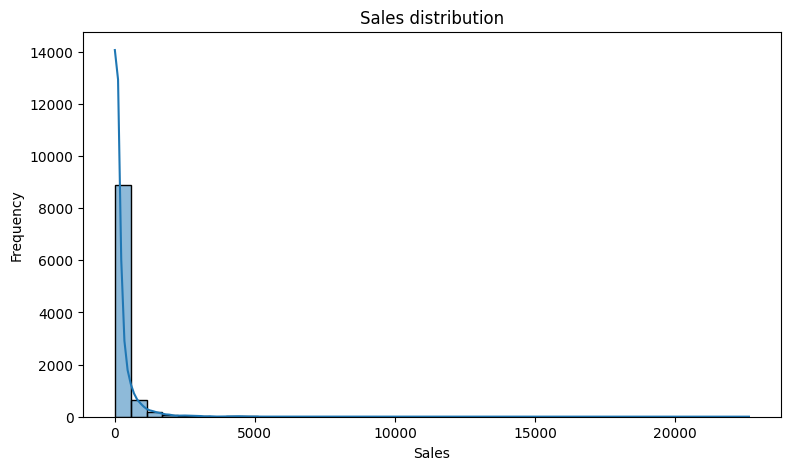

In [ ]:
# Distribution of Sales
plot.figure(figsize=(9, 5))
sns.histplot(ss_NaN['Sales'], bins=40, kde=True)
plot.title('Sales distribution')
plot.xlabel('Sales')
plot.ylabel('Frequency')
plot.show()

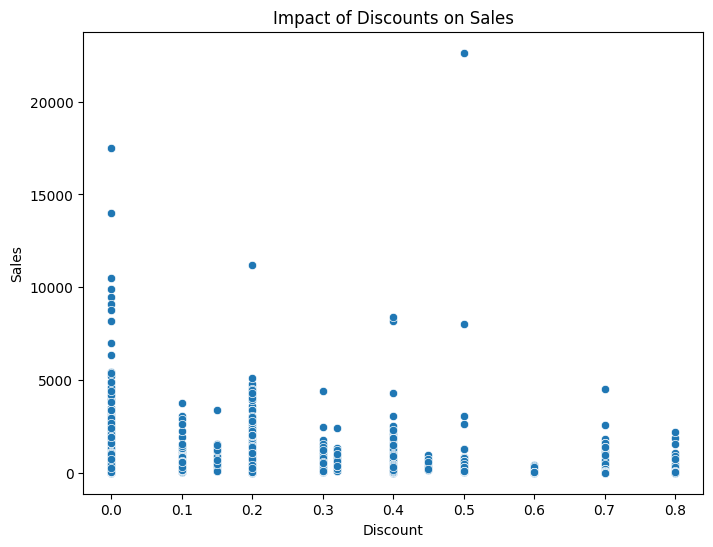

In [ ]:
#Impact of discount on sales
plot.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Sales', data=ss_NaN)
plot.title('Impact of Discounts on Sales')
plot.xlabel('Discount')
plot.ylabel('Sales')
plot.show()


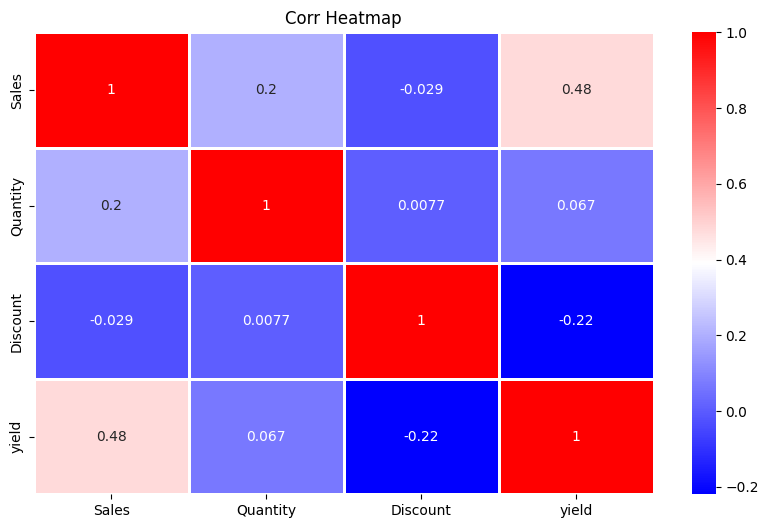

In [ ]:
# Correlation heatmap
numeric_df = ss_NaN.select_dtypes(include=[np.number])
plot.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='bwr', linewidths=1)
plot.title('Corr Heatmap')
plot.show()


# **BUSINESS QUESTIONS**

##  **1. Product analysis. What section, sub-section is bought the most, sold the most and generates most profit?**

In [ ]:
ss_NaN.groupby("sections")["sub-sections"].value_counts()

sections         sub-sections
Furniture        Furnishings      942
                 Chairs           614
                 Tables           313
                 Bookcases        227
Office Supplies  Binders         1503
                 Paper           1360
                 Storage          838
                 Art              782
                 Appliances       460
                 Labels           364
                 Envelopes        253
                 Fasteners        215
                 Supplies         189
Technology       Phones           881
                 Accessories      771
                 Machines         115
                 Copiers           68
Name: count, dtype: int64

In [ ]:
#grouping sections of products
sects = ss_NaN.groupby("sections")[["Quantity","Sales","yield"]].sum()\
.reset_index()\
.sort_values(by="Quantity",ascending = False)[:10]
sects

,sections,Quantity,Sales,yield
1,Office Supplies,22695.0,709284.2350,120043.1728
0,Furniture,7926.0,730925.5623,19345.5609
2,Technology,6896.0,832648.3450,144375.1337


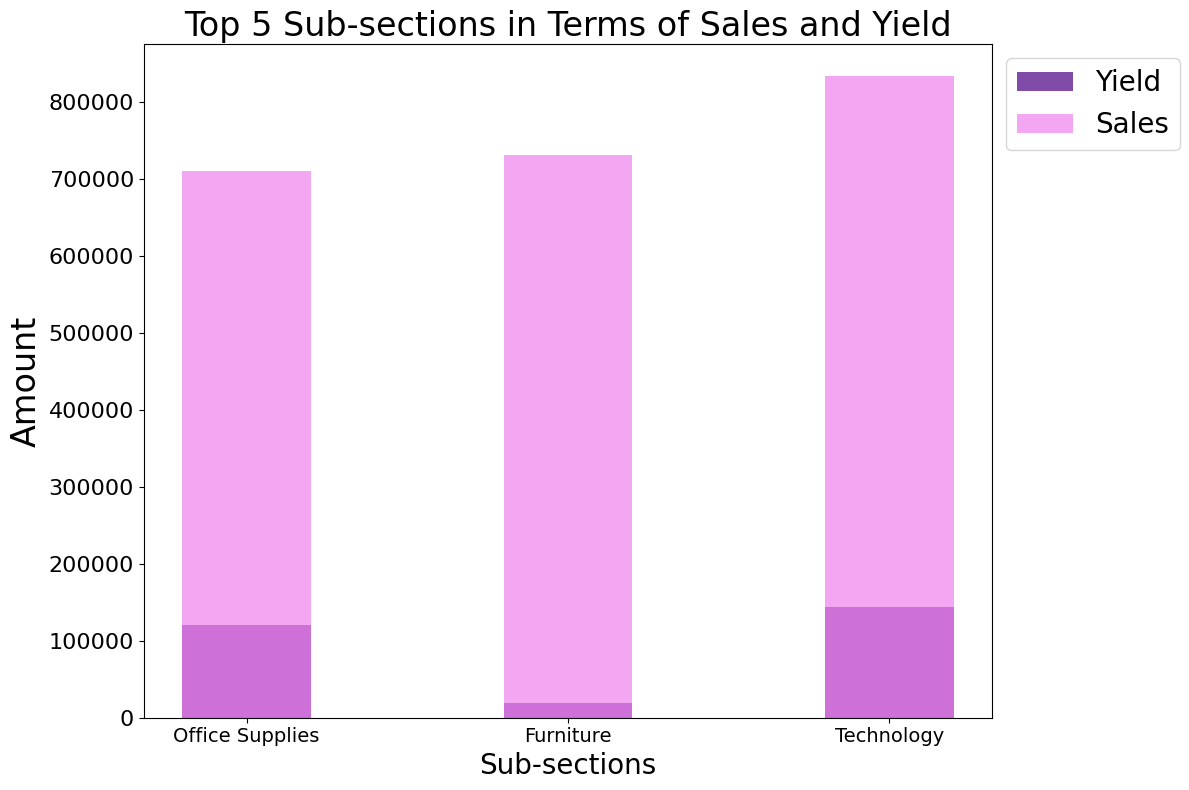

In [ ]:
# Extracting the data from the DataFrame
sections = sects['sections']
yield_data = sects['yield']
sales_data = sects['Sales']

fig, bx = plot.subplots(figsize=(12, 8))

bar_width = 0.4
index = np.arange(len(sections))
bars1 = bx.bar(index, yield_data, bar_width, label='Yield', color='indigo', alpha=0.7)
bars2 = bx.bar(index, sales_data, bar_width, label='Sales', color='violet', alpha=0.7)

# Adding title and labels
bx.set_title('Top 5 Sub-sections in Terms of Sales and Yield', fontsize=24)
bx.set_xlabel('Sub-sections', fontsize=20)
bx.set_ylabel('Amount', fontsize=24)

# Setting ticks and tick labels font size
bx.set_xticks(index)
bx.set_xticklabels(sections, fontsize=14)
bx.tick_params(axis='y', labelsize=16)

# Adding a legend with increased font size and positioning it at the top right
bx.legend(fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))

plot.tight_layout()

# Display the chart
plot.show()

**OBSERVATION**:The section of products bought the most are office supplies but technology has the highest sales and generates the most profit.

In [ ]:
# grouping sub sections by sales
sub_section_group = ss_NaN.groupby(["sub-sections"])["Sales"].sum()
sort_sub_section = sub_section_group.sort_values(ascending=False).reset_index()[:5]
sort_sub_section

,sub-sections,Sales
0,Phones,328949.662
1,Chairs,323738.903
2,Storage,221538.886
3,Tables,202137.673
4,Binders,197403.940


In [ ]:
#grouping sub-sections by yield
sub_section_group = ss_NaN.groupby(["sub-sections"])["yield"].sum()
sort_sub_section = sub_section_group.sort_values(ascending=False).reset_index()[:5]
sort_sub_section

,sub-sections,yield
0,Copiers,55617.8249
1,Phones,44267.1659
2,Accessories,41105.3860
3,Paper,33830.8675
4,Binders,28294.9728


**OBSERVATIONS:** The top selling sub-sections are phones whereas the highest profit is generated from copiers. Also, even though chairs can be found in the top 5 selling sub-sections it is not in the top 5 sub-sections that brings in alot of profit. Phones and binders are the only sub-sections in the top selling and yield table.


In [ ]:
#grouping top 5 sub-sections in terms of sales and yield.
sub_sects = ss_NaN.groupby("sub-sections")[["yield","Sales"]].agg({'yield':'sum','Sales':'sum'})\
.nlargest(5, 'yield') \
    .reset_index()

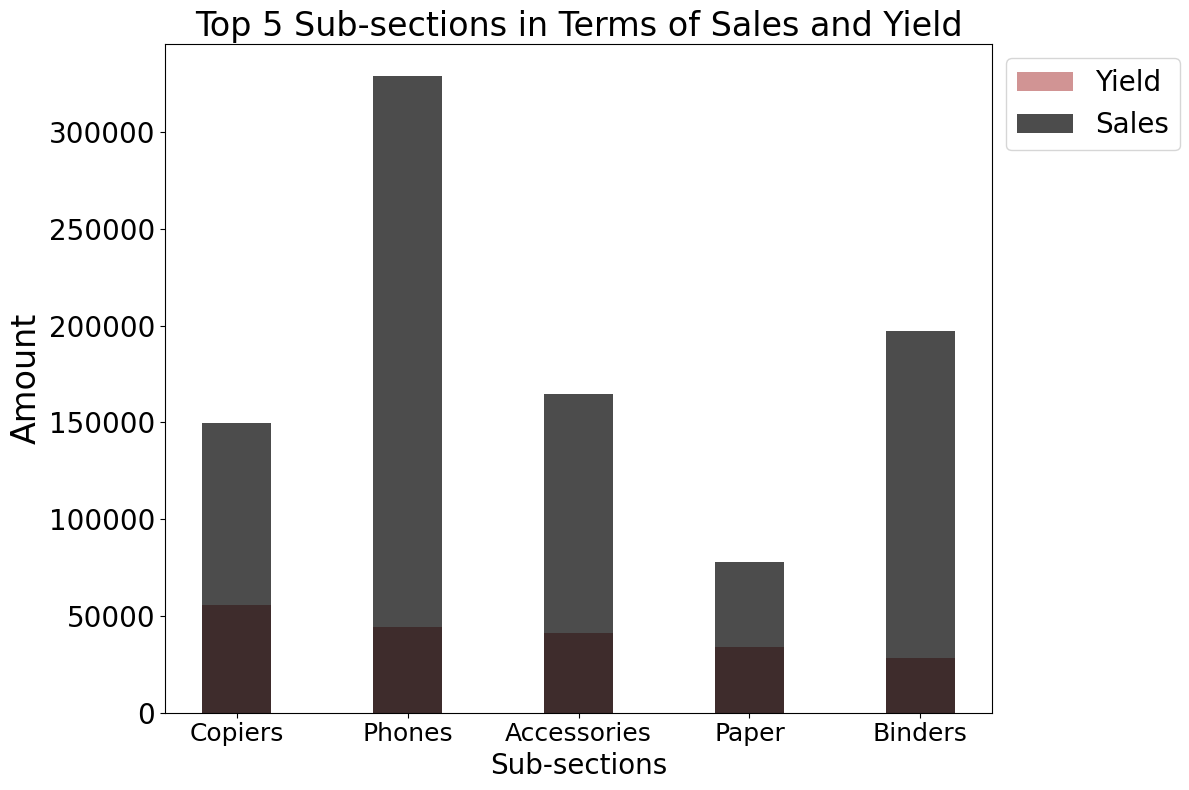

In [ ]:
# Extracting the data from the DataFrame
sub_sections = sub_sects['sub-sections']
yield_data = sub_sects['yield']
sales_data = sub_sects['Sales']

fig, bx = plot.subplots(figsize=(12, 8))
ind = np.arange(len(sub_sections))

bars1 = bx.bar(ind, yield_data, bar_width, label='Yield', color='brown', alpha=0.5)
bars2 = bx.bar(ind, sales_data, bar_width, label='Sales', color='black', alpha=0.7)

# Adding title and labels
bx.set_title('Top 5 Sub-sections in Terms of Sales and Yield', fontsize=24)
bx.set_xlabel('Sub-sections', fontsize=20)
bx.set_ylabel('Amount', fontsize=24)

# Setting ticks and tick labels font size
bx.set_xticks(ind)
bx.set_xticklabels(sub_sections, fontsize=18)
bx.tick_params(axis='y', labelsize=20)

# Adding a legend with increased font size and positioning it at the top right
bx.legend(fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))

plot.tight_layout()

# Display the chart
plot.show()

The yield to sales ratio of the sub-sections shows that copiers are leading.Even though less copiers are being bought, the generate the highest profit ratio.


## **2. Regional analysis. Which sector, place and town generates most sales and profit?**

In [ ]:
ss_NaN.sector.value_counts()


,count
sector,
West,3178
East,2821
Central,2293
South,1603


**Observations:**Most products are bought from the west.

In [ ]:
top_place=ss_NaN.groupby("place")[["Sales","yield"]].sum()\
.reset_index()\
.sort_values(by="yield",ascending = False)[:5]
top_place

,place,Sales,yield
329,New York City,252934.971,61547.5026
266,Los Angeles,174729.283,30318.6225
452,Seattle,114170.472,27432.9464
438,San Francisco,112135.664,17581.7180
123,Detroit,42294.750,13134.1929


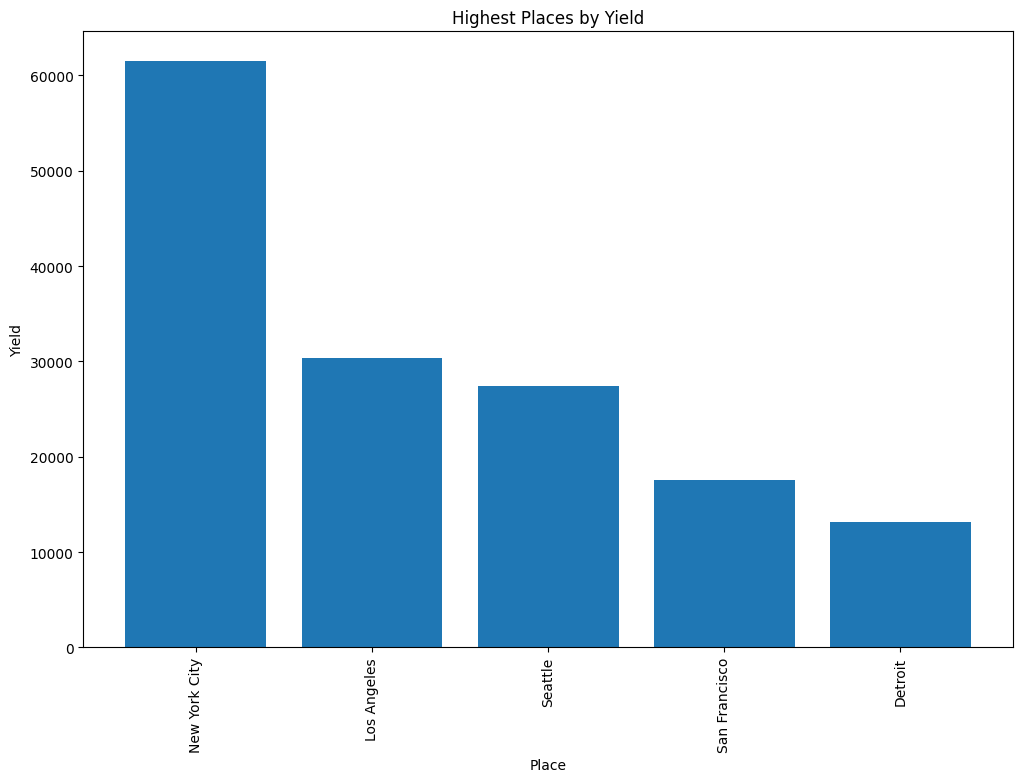

In [ ]:
plot.figure(figsize=(12,8))
plot.bar(top_place['place'], top_place['yield'], align='center')
plot.xlabel("Place")
plot.ylabel("Yield")
plot.title("Highest Places by Yield")
plot.xticks(rotation=90)

plot.show()

**Observation:**More revenue is got from New York. It could serve as a place to open a new branch as alot of sales and profit is made from there.

In [ ]:
sector_group = ss_NaN.groupby(["sector"])["yield"].sum()
sort_sector = sector_group.sort_values(ascending=False)
sort_sector

,yield
sector,
West,106455.6284
East,89750.4807
South,47603.0688
Central,39954.6895


Observations: Items sold to West genrates more profit.

In [ ]:
Areas = ss_NaN[['place','town','sector','Sales','yield']]

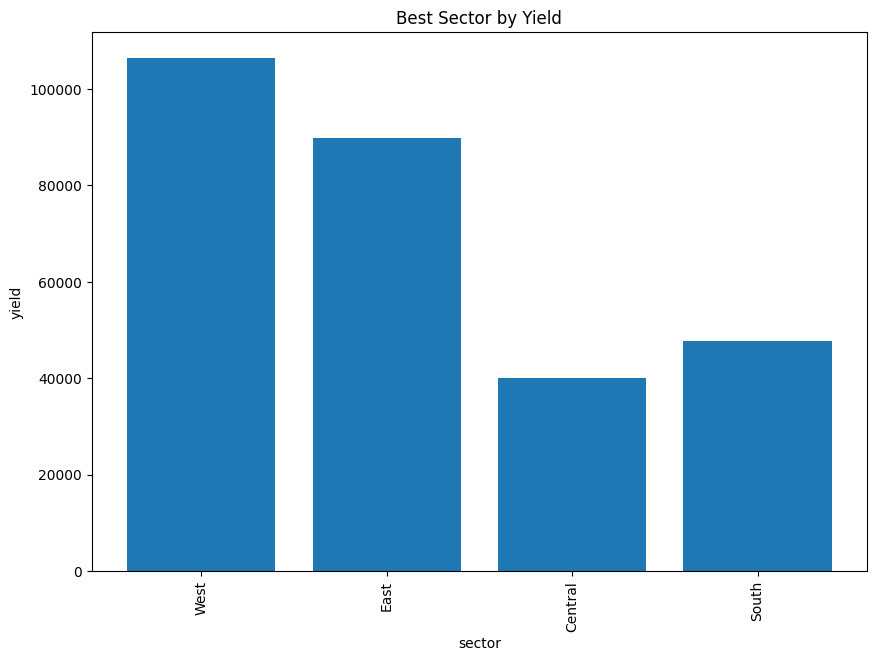

In [ ]:
sector_group= Areas.groupby(['sector'],as_index=False).sum(['Sales','yield'])
sector_group

sector_group.sort_values(by='Sales', ascending=False, inplace=True)
top_sector=pd.DataFrame(sector_group[:5])
top_sector

plot.figure(figsize=(10,7))
plot.bar(top_sector['sector'], top_sector['yield'], align='center')
plot.xlabel("sector")
plot.ylabel("yield")
plot.title("Best Sector by Yield")
plot.xticks(rotation=90)

plot.show()


**Observations:** Items sold to the bring in the most income

<Axes: xlabel='sector'>

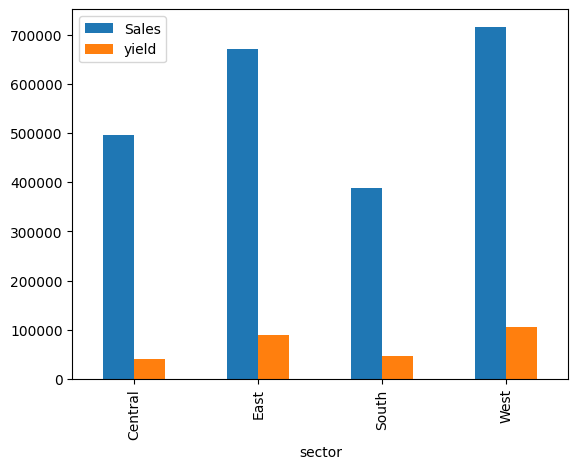

In [ ]:
sector = ss_NaN[ss_NaN["item name"] == "Canon imageCLASS 2200 Advanced Copier	"]
sector_group = ss_NaN[["Sales", "yield"]].groupby(ss_NaN["sector"]).sum()
sector_group.plot(kind='bar')

**Observation**: From the product analysis we got to that the Canon imageCLASS 2200 Advanced Copier is the product generates the most profit. So we compare and use the product with the highest yield to determine which sector mostly buys and generetes the yield. From the above it can be seen that it is the West mostly buy this products.


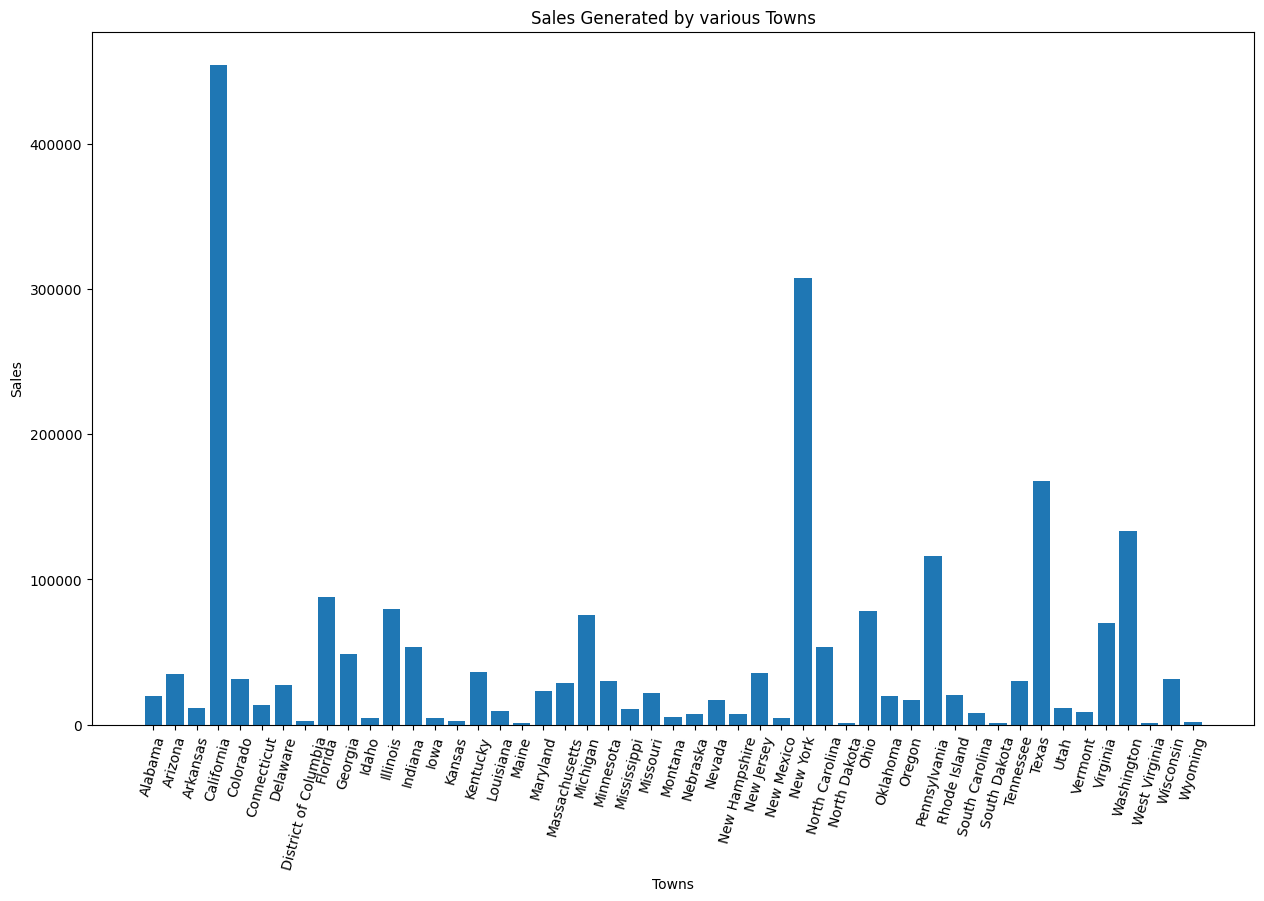

In [ ]:
arranged_data = Areas.groupby(['town'], as_index=False).sum()
arranged_data.sort_values(by='Sales')
plot.figure(figsize=(15,9))
plot.bar(arranged_data['town'], arranged_data['Sales'], align='center',)
plot.xlabel("Towns")
plot.ylabel("Sales")
plot.title("Sales Generated by various Towns")
plot.xticks(rotation=75)
plot.show()

**Observation:** People from Califonia buy alot of items from the store

## **3. What category of customers generate the highest profit?**

([<matplotlib.patches.Wedge at 0x790866b8ba90>,
 [Text(-0.06509555277013969, 1.0980722057358296, 'Consumer'),
  Text(-0.5294088409231367, -0.9642231480069441, 'Corporate'),
  Text(0.9312040159160334, -0.585541698550882, 'Home Office')],
 [Text(-0.03550666514734892, 0.598948475855907, '51.88%'),
  Text(-0.28876845868534723, -0.5259398989128785, '30.25%'),
  Text(0.5079294632269272, -0.3193863810277538, '17.87%')])

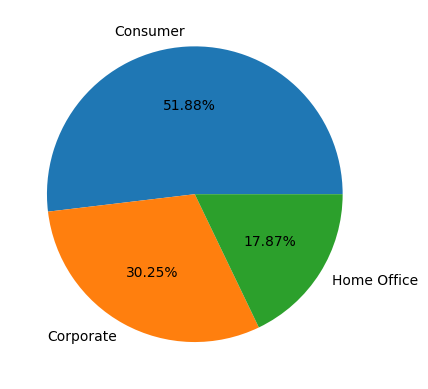

In [ ]:
types_of_customers = ss_NaN['type of customer'].value_counts()
types_of_customers
plot.pie(types_of_customers, labels=types_of_customers.index, autopct='%2.2f%%')

**Observation**:Majority of the customers are consumers.


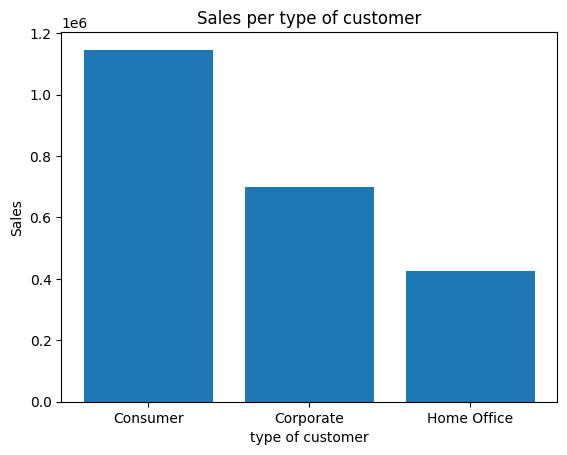

In [ ]:
#category of segments per sales
sales_per_types_of_customers= ss_NaN.groupby('type of customer')['Sales'].sum()
sales_per_types_of_customers

plot.bar(sales_per_types_of_customers.index, sales_per_types_of_customers.values)
plot.xlabel('type of customer')
plot.ylabel('Sales')
plot.title('Sales per type of customer')
plot.show()

([<matplotlib.patches.Wedge at 0x790866a27d60>,
 [Text(-0.014983469195760078, 1.0998979478346433, 'Consumer'),
  Text(-0.5987804785388581, -0.9227469525936005, 'Corporate'),
  Text(0.9145050406904596, -0.6112941440515695, 'Home Office')],
 [Text(-0.008172801379505495, 0.5999443351825327, '50.43%'),
  Text(-0.326607533748468, -0.5033165195965092, '30.81%'),
  Text(0.49882093128570515, -0.3334331694826742, '18.76%')])

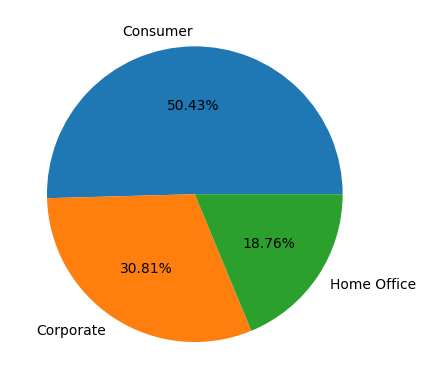

In [ ]:

plot.pie(sales_per_types_of_customers, labels=sales_per_types_of_customers.index, autopct='%2.2f%%')

**Observation**: From the above it can be seen that consumers purchase alot of products.

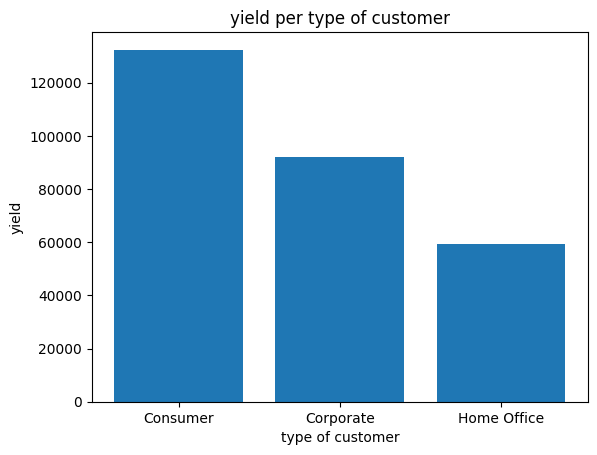

In [ ]:
#category of segments per sales
profit_per_segment = ss_NaN.groupby('type of customer')['yield'].sum()
profit_per_segment

plot.bar(profit_per_segment.index, profit_per_segment.values)
plot.xlabel('type of customer')
plot.ylabel('yield')
plot.title('yield per type of customer')
plot.show()

([<matplotlib.patches.Wedge at 0x790866a0b610>,
 [Text(0.11551492459677659, 1.0939178681214605, 'Consumer'),
  Text(-0.7588982563518084, -0.7962872826475287, 'Corporate'),
  Text(0.8715790873293218, -0.6710811385594045, 'Home Office')],
 [Text(0.06300814068915087, 0.5966824735207966, '46.65%'),
  Text(-0.4139445034646227, -0.43433851780774285, '32.46%'),
  Text(0.47540677490690275, -0.3660442573960388, '20.89%')])

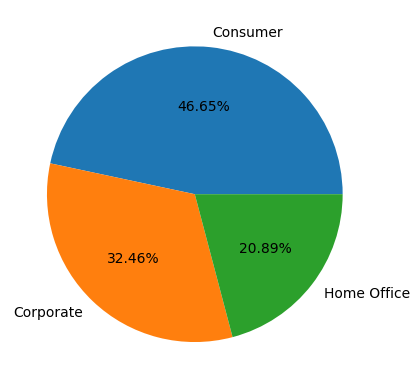

In [ ]:
type_of_customer = ss_NaN.groupby('type of customer')['yield'].sum()
plot.pie(type_of_customer, labels=type_of_customer.index, autopct='%2.2f%%')

**Observation**:This shows that consumer brings in the most profit.
In comparing the sales chart and the profits, in terms of sales and profits, consumer dominates.



##  **4. Shipping analysis. Which shipping mode generates the highest sales and profit?**

In [ ]:
#calculating the yeild and sales according to the method used.
shipping = ss_NaN.groupby("shipping method")[["yield","Sales","Customer Name"]]\
.agg({'yield':'sum','Sales':'sum','Customer Name':'count'})\
.reset_index()

shipping['percentage'] = (shipping['yield'] / shipping['Sales'] * 100).round(1)

shipping.columns = ['shipping method', 'yield', 'Sales','Number of Orders','percentage']

shipping

,shipping method,yield,Sales,Number of Orders,percentage
0,First Class,48737.5693,3.490484e+05,1526,14.0
1,Same Day,15736.6619,1.273769e+05,537,12.4
2,Second Class,57299.0970,4.581387e+05,1930,12.5
3,Standard Class,161990.5392,1.338294e+06,5902,12.1


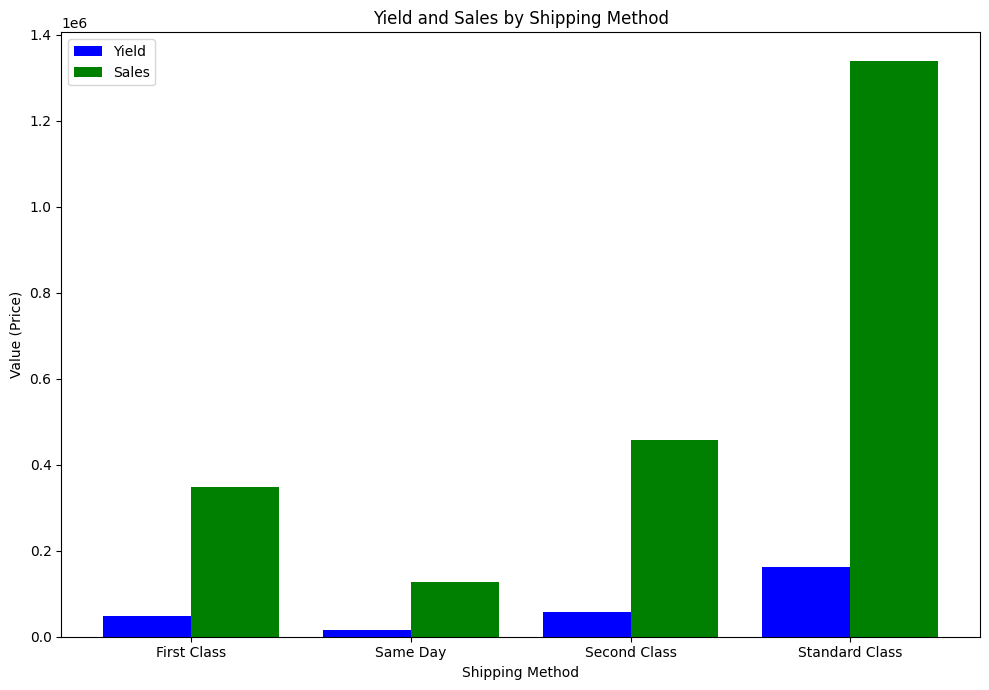

In [ ]:
# Sample data (assuming 'shipping' is a pandas DataFrame with 'yield', 'Sales', and 'shipping method')
shipping_methods = shipping['shipping method']
yield_data = shipping['yield']
sales_data = shipping['Sales']

fig, bx = plot.subplots(figsize=(10, 7))


bar_width = 0.4
ind = np.arange(len(shipping_methods))

# Create the bars for 'yield' and 'sales'
bars1 = bx.bar(ind, yield_data, bar_width, label='Yield', color='blue')
bars2 = bx.bar(ind + bar_width, sales_data, bar_width, label='Sales', color='green')

# Add labels and title
bx.set_xlabel('Shipping Method')
bx.set_ylabel('Value (Price)')
bx.set_title('Yield and Sales by Shipping Method')
bx.set_xticks(ind + bar_width / 2)
bx.set_xticklabels(shipping_methods)

# Adding legend
bx.legend()

# Display the chart
plot.tight_layout()
plot.show()


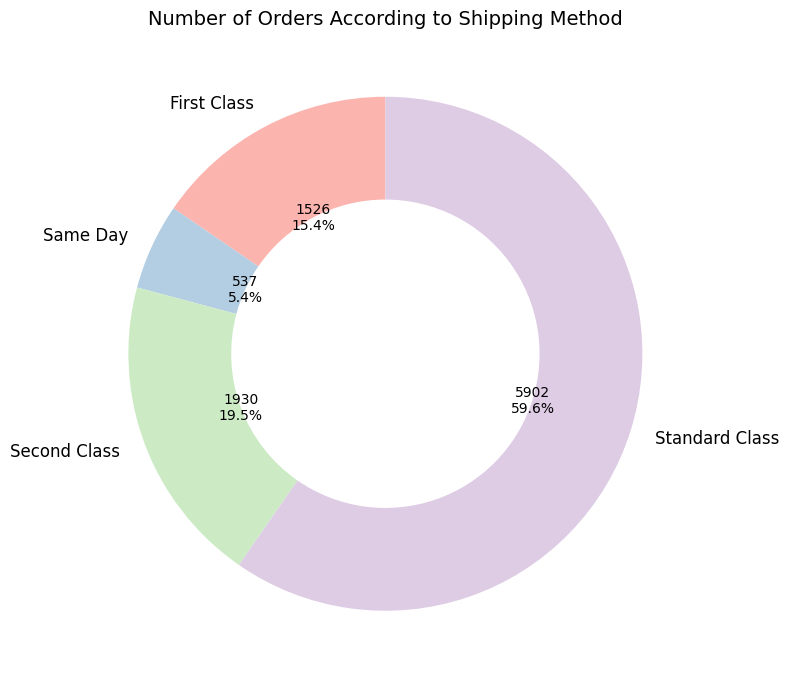

In [ ]:
shipping_methods = shipping['shipping method']
number_of_orders = shipping['Number of Orders']

fig, bx = plot.subplots(figsize=(8, 8))

# Creating a pie chart
wedges, texts, autotexts = bx.pie(number_of_orders,
                                  labels=shipping_methods,
                                  autopct='%1.1f%%',  # Show percentage
                                  startangle=90,  # Rotate start angle for better layout
                                  colors=plot.get_cmap('Pastel1').colors,  # Use Pastel colors similar to Plotly
                                  wedgeprops=dict(width=0.4))  # This makes the pie chart a donut

# Setting title and styling
bx.set_title('Number of Orders According to Shipping Method', fontsize=14)

# Customize the label text (shipping method and number of orders)
for text, autotext, value in zip(texts, autotexts, number_of_orders):
    text.set_fontsize(12)
    autotext.set_text(f'{value}\n{autotext.get_text()}')  # Show value + percentage inside the chart

# Display the donut chart
plot.tight_layout()
plot.show()

**OBSERVATION**:It can be seen that, the standard class shipping method generates more sales and profit. But, also the first class had the highest percentage of sale to profit ratio. This could mean if the sales of first class customer increases the there will be a significant increase in profit.


## **5. What is the impact of discounts on sales and profit?**



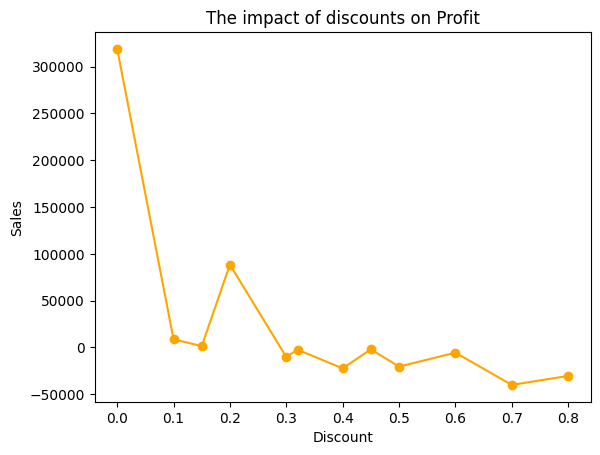

In [ ]:
new_ss = ss_NaN.groupby('Discount')['yield'].sum().reset_index()
plot.plot(new_ss['Discount'],new_ss['yield'], marker='o', linestyle='-', label='Yearly Profit', color='orange')
plot.xlabel('Discount')
plot.ylabel('Sales')
plot.title('The impact of discounts on Profit')
plot.show()


**Observation **: Discounts past 0.2 has a negative average profit also 0.2. Items with 0 discounts has the most number of orders.

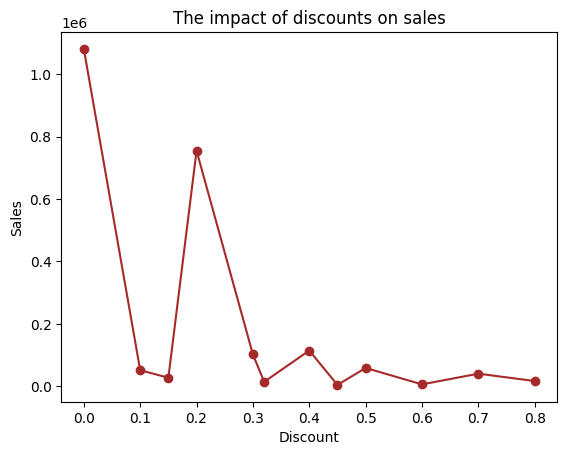

In [ ]:
new_ss = ss_NaN.groupby('Discount')['Sales'].sum().reset_index()
plot.plot(new_ss['Discount'],new_ss['Sales'], marker='o', linestyle='-', label='Yearly Sales', color='brown')
plot.xlabel('Discount')
plot.ylabel('Sales')
plot.title('The impact of discounts on sales')
plot.show()


**Observation** : Items with no discounts are bought the most.

## **6. Monthly and yearly trends.What are the monthly and yearly trends in terms of sales and profit?**

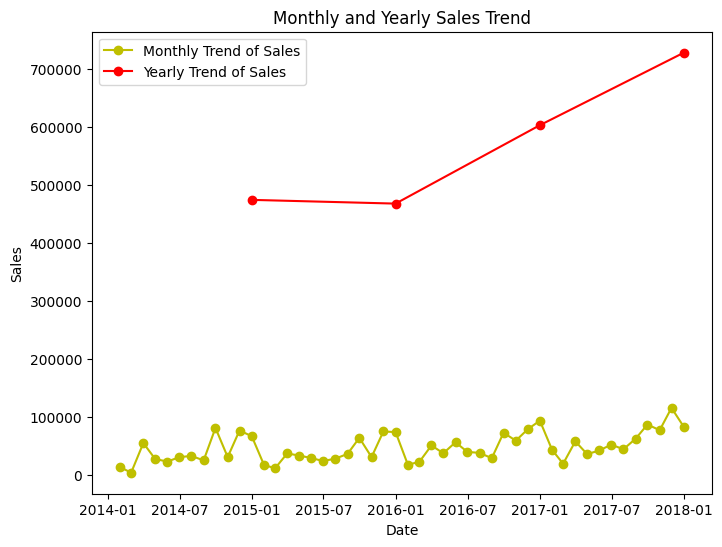

In [ ]:
# Converting the Order Date
ss_NaN['Order Date'] = pd.to_datetime(ss_NaN['Order Date'])

ss_NaN.set_index('Order Date', inplace=True)

monthly_trend = ss_NaN['Sales'].resample('M').sum()
yearly_trend = ss_NaN['Sales'].resample('Y').sum()

plot.figure(figsize=(8, 6))
plot.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='y', label='Monthly Trend of Sales')
plot.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='r', label='Yearly Trend of Sales')
plot.xlabel('Date')
plot.ylabel('Sales')
plot.title('Monthly and Yearly Sales Trend')
plot.legend()
plot.show()

**Observation**:There was a drop 2016 but since then sales has been rising gradually.

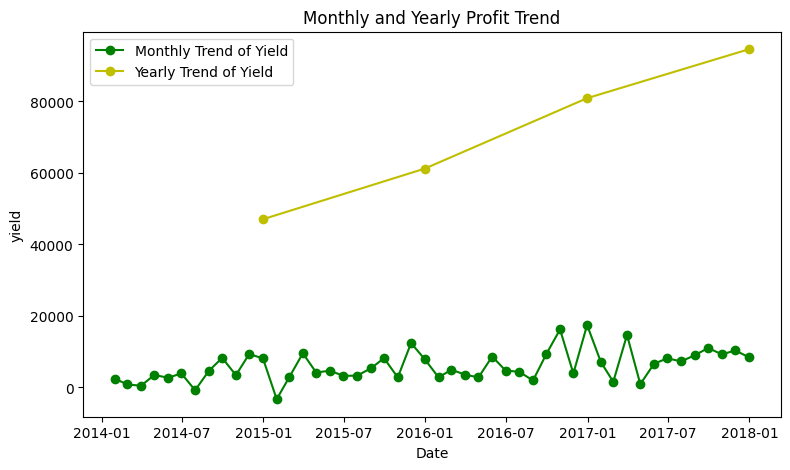

In [ ]:
# Resample data to monthly and yearly frequencies
monthly_trends_yield = ss_NaN['yield'].resample('M').sum()
yearly_trends_yield = ss_NaN['yield'].resample('Y').sum()

plot.figure(figsize=(9, 5))
plot.plot(monthly_trends_yield.index, monthly_trends_yield.values, marker='o', linestyle='-', color='g', label='Monthly Trend of Yield')
plot.plot(yearly_trends_yield.index, yearly_trends_yield.values, marker='o', linestyle='-', color='y', label='Yearly Trend of Yield')
plot.xlabel('Date')
plot.ylabel('yield')
plot.title('Monthly and Yearly Profit Trend')
plot.legend()
plot.show()

**Observation:**There has been a sturdy increament of profit over the years.

# **CONCLUSION**

**LIMITATIONS**
1. Missing values can affect the validity of the results.
2. Incorrect entries can affects the results which can lead to bad data quality.

**RECOMMENDATIONS**
1. For discounted items, find out why items on discount bring in a negative income.
2. Work with technology companies to be a distributor since most product generating income comes from technology items.
3. Can open a physical store in California since they buy alot of products to increase sales.

# **REFERENCES**

1. scikit-learn
2. GeeksforGeeks
3. Python.org
4. https://www.kaggle.com/datasets/vivek468/superstore-dataset-final